# LOADING THE MODEL

In [41]:
from keras.models import load_model
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


loaded_model.load_weights('model.h5')

model = loaded_model


print('Model successfully loaded')

Model successfully loaded


# LOADING IMAGE

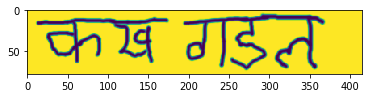

In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

characters = ['ka','kha','ga','gha','kna','cha','chha','ja','jha','yna','ta','tha','da','dha','ana','taa','thaa','daa','dhaa','na','pa','pha','ba','dha','ma','ya','ra','la','va','motosaw','petchiryosaw','patalosaw','ha','ksha','tra','gya','0','1','2','3','4','5','6','7','8','9','a','aa','i','ee','u','oo','ae','ai','o','au','an','ah']

#enter input image here
image = cv2.imread('example.png',0)
height, width = image.shape
plt.imshow(image)

# WORD SEGMENTATION

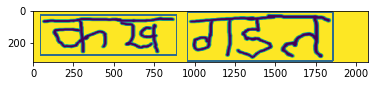

In [38]:
#resizing the image to find spaces better
image = cv2.resize(image, dsize=(width*5,height*4), interpolation=cv2.INTER_CUBIC)
#grayscale
#gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


#binary
ret,thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)


#dilation
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)


#adding GaussianBlur
gsblur=cv2.GaussianBlur(img_dilation,(5,5),0)


#find contours
ctrs,hier = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

m = list()
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
pchl = list()
dp = image.copy()
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(dp,(x-10,y-10),( x + w + 10, y + h + 10 ),(90,0,255),9)
    
plt.imshow(dp) 

# LETTER SEGMENTATION

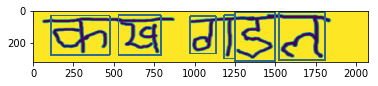

In [39]:
height,width=image.shape
inverted=255-image
#plt.imshow(inverted)
threshold=8000
defect_row=[]
all_rows=[]
ctr=0
#print(width)
for i in range(width):
    pixelcount=0
    for j in range(height):
        pixelcount+=inverted[j,i]
    flag=0
    if pixelcount<=threshold:
        flag=1
    defect_row.append(flag)
    all_rows.append(pixelcount)
    ctr+=1
for i in range(width):
    if(defect_row[i]==1):
        for j in range(height):
            inverted[j,i]=0
#plt.imshow(inverted)
inverted=255-inverted
ret,thresh = cv2.threshold(inverted,127,255,cv2.THRESH_BINARY_INV)


#dilation
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)


#adding GaussianBlur
gsblur=cv2.GaussianBlur(img_dilation,(5,5),0)


#find contours
ctrs,hier = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
pchl = list()
dp = image.copy()
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(dp,(x-10,y-10),( x + w + 10, y + h + 10 ),(90,0,255),9)
    
plt.imshow(dp)

# CLASSIFICATION

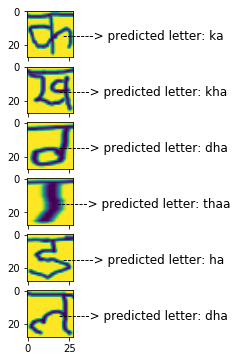

Predicted String: kakhadhathaahadha


In [40]:
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr) 
    # Getting ROI
    roi = image[y-10:y+h+10, x-10:x+w+10]
    roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
    #roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    
    roi = np.array(roi)
    t = np.copy(roi)
    t = t / 255.0
    t = 1-t
    t = t.reshape(1,784)
    m.append(roi)
    pred = model.predict_classes(t)
    pchl.append(pred)

    

pcw = list()
interp = 'bilinear'
fig, axs = plt.subplots(nrows=len(sorted_ctrs), sharex=True, figsize=(1,len(sorted_ctrs)))
for i in range(len(pchl)):
    #print (pchl[i][0])
    pcw.append(characters[pchl[i][0]])
    axs[i].set_title('-------> predicted letter: '+characters[pchl[i][0]], x=2.5,y=0.24)
    axs[i].imshow(m[i], interpolation=interp)

plt.show()


predstring = ''.join(pcw)
print('Predicted String: '+predstring)